#**IMPORTING Libraries** : 

In [7]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg


#Loading the Dataset

In [6]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10

# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()


In [9]:
#To categorical
y_train = keras.utils.to_categorical(trainY, 10)
y_valid = keras.utils.to_categorical(testY, 10)

In [12]:
#Normalize
x_train = trainX/255
x_valid = testX / 255

#Creating the model

In [19]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu", 
                 ))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation="softmax"))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)      

In [23]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=[keras.metrics.CategoricalAccuracy()],optimizer='Adam')

#Data Augmentation

In [25]:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

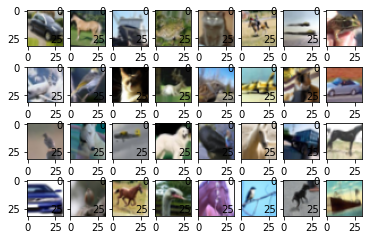

In [27]:
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [48]:
datagen.fit(x_train)

##Training the model

In [49]:
model.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/10
1562/1562 [==============================] - 39s 25ms/step - loss: 0.6076 - categorical_accuracy: 0.8036 - val_loss: 0.5738 - val_categorical_accuracy: 0.8197
Epoch 2/10
1562/1562 [==============================] - 40s 25ms/step - loss: 0.5223 - categorical_accuracy: 0.8277 - val_loss: 0.5789 - val_categorical_accuracy: 0.8179
Epoch 3/10
1562/1562 [==============================] - 38s 25ms/step - loss: 0.4801 - categorical_accuracy: 0.8411 - val_loss: 0.7699 - val_categorical_accuracy: 0.7800
Epoch 4/10
1562/1562 [==============================] - 40s 25ms/step - loss: 0.4472 - categorical_accuracy: 0.8507 - val_loss: 0.5524 - val_categorical_accuracy: 0.8287
Epoch 5/10
1562/1562 [==============================] - 39s 25ms/step - loss: 0.4359 - categorical_accuracy: 0.8555 - val_loss: 0.5382 - val_categorical_accuracy: 0.8339
Epoch 6/10
1562/1562 [==============================] - 39s 25ms/step - loss: 0.4092 - categorical_accuracy: 0.8630 - val_loss: 0.5045 - val_categoric

#Making Predictions

In [26]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

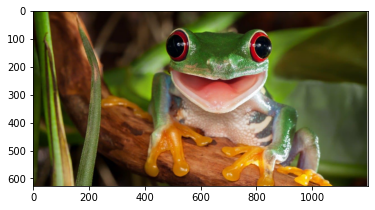

In [29]:
show_image('./tree-frog.jpg')

In [32]:
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, target_size=(32,32))
    return image

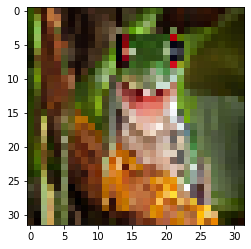

In [50]:
image = load_and_scale_image('./tree-frog.jpg')
plt.imshow(image, cmap='gray')

In [51]:
image = image_utils.img_to_array(image)
# This reshape corresponds to 1 image of 28x28 pixels with one color channel
image = image.reshape(1,32,32,3) 

In [52]:
image = image / 255

In [53]:
prediction = model.predict(image)
print(prediction)

1/1 [==============================] - 0s 22ms/step
[[8.84040855e-05 1.67166741e-04 4.11726274e-02 6.43040314e-02
  1.23842806e-01 4.13905643e-02 7.27011263e-01 1.21701602e-03
  2.30896519e-04 5.75090467e-04]]


It's a frog


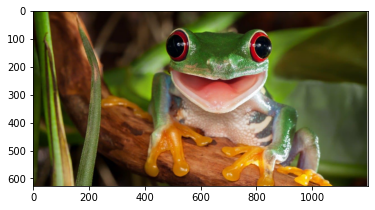

In [60]:
classes = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]
print("It's a "+classes[np.argmax(prediction)])
show_image('./tree-frog.jpg')